<h1>Data Science QUIZ</h1>
Alexander L. Myfia - 2702342174

1. Import libraries and read csv

In [238]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv('datasetA.csv')
display(df)

,Unnamed: 0,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
0,0,Bobby JacksOn,30,Male,B-,Cancer,2024-01-31,Matthew Smith,Sons and Miller,Blue Cross,18856.281306,328,Urgent,2024-02-02,Paracetamol,Normal
1,1,LesLie TErRy,62,Male,A+,Obesity,2019-08-20,Samantha Davies,Kim Inc,Medicare,33643.327287,265,Emergency,2019-08-26,Ibuprofen,Inconclusive
2,2,DaNnY sMitH,76,Female,A-,Obesity,2022-09-22,Tiffany Mitchell,Cook PLC,Aetna,27955.096079,205,Emergency,2022-10-07,Aspirin,Normal
3,3,andrEw waTtS,28,Female,O+,Diabetes,2020-11-18,Kevin Wells,"Hernandez Rogers and Vang,",Medicare,37909.782410,450,Elective,2020-12-18,Ibuprofen,Abnormal
4,4,adrIENNE bEll,43,Female,AB+,Cancer,2022-09-19,Kathleen Hanna,White-White,Aetna,14238.317814,458,Urgent,2022-10-09,Penicillin,Abnormal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55495,55495,eLIZABeTH jaCkSOn,42,Female,O+,Asthma,2020-08-16,Joshua Jarvis,Jones-Thompson,Blue Cross,2650.714952,417,Elective,2020-09-15,Penicillin,Abnormal
55496,55496,KYle pEREz,61,Female,AB-,Obesity,2020-01-23,Taylor Sullivan,Tucker-Moyer,Cigna,31457.797307,316,Elective,2020-02-01,Aspirin,Normal
55497,55497,HEATher WaNG,38,Female,B+,Hypertension,2020-07-13,Joe Jacobs DVM,"and Mahoney Johnson Vasquez,",UnitedHealthcare,27620.764717,347,Urgent,2020-08-10,Ibuprofen,Abnormal
55498,55498,JENniFER JOneS,43,Male,O-,Arthritis,2019-05-25,Kimberly Curry,"Jackson Todd and Castro,",Medicare,32451.092358,321,Elective,2019-05-31,Ibuprofen,Abnormal


2. Get number of null values

In [240]:
df.isnull().sum()

Unnamed: 0               0
Name                     0
Age                      0
Gender                   0
Blood Type               0
Medical Condition        0
Date of Admission        0
Doctor                2198
Hospital                 0
Insurance Provider    2193
Billing Amount           0
Room Number              0
Admission Type           0
Discharge Date           0
Medication            5417
Test Results             0
dtype: int64

3. Collect existence of null values in every row

In [241]:
df[df.isnull().any(axis=1)].count()

Unnamed: 0            9281
Name                  9281
Age                   9281
Gender                9281
Blood Type            9281
Medical Condition     9281
Date of Admission     9281
Doctor                7083
Hospital              9281
Insurance Provider    7088
Billing Amount        9281
Room Number           9281
Admission Type        9281
Discharge Date        9281
Medication            3864
Test Results          9281
dtype: int64

4. Get average age of both genders

In [242]:
df[['Gender', 'Age']].groupby(['Gender']).mean()

,Age
Gender,
Female,51.578735
Male,51.500252


5. Count the number of Ibuprofe users

In [253]:
df[df['Medication'] == 'Ibuprofen'].count(axis='rows')

Unnamed: 0            15477
Name                  15477
Age                   15477
Gender                15477
Blood Type            15477
Medical Condition     15477
Date of Admission     15477
Doctor                15477
Hospital              15477
Insurance Provider    15477
Billing Amount        15477
Room Number           15477
Admission Type        15477
Discharge Date        15477
Medication            15477
Test Results          15477
dtype: int64

6. Fill null values with most frquent data

In [255]:
df.fillna(df.mode().iloc[0], inplace=True)
df['Medication'].value_counts()

Medication
Ibuprofen      15477
Lipitor        10047
Penicillin     10032
Aspirin         9989
Paracetamol     9955
Name: count, dtype: int64

7. Count admitted patients in hospital

In [247]:
df['Hospital'].value_counts()

Hospital
LLC Smith                      44
Ltd Smith                      39
Johnson PLC                    38
Smith Ltd                      37
Smith PLC                      36
                               ..
and Montoya Flores, Boyer       1
Carter and Dunn King,           1
Hall, Brown Black and           1
Peterson Scott and Thomas,      1
Moreno Murphy, Griffith and     1
Name: count, Length: 39876, dtype: int64

8. getting most common medical condition

In [248]:
df['Medical Condition'].value_counts()

Medical Condition
Arthritis       9308
Diabetes        9304
Hypertension    9245
Obesity         9231
Cancer          9227
Asthma          9185
Name: count, dtype: int64

9. Box Plot

([<matplotlib.axis.XTick at 0x23a20dc2c30>,
 [Text(1, 0, '<=15'), Text(2, 0, '>=87')])

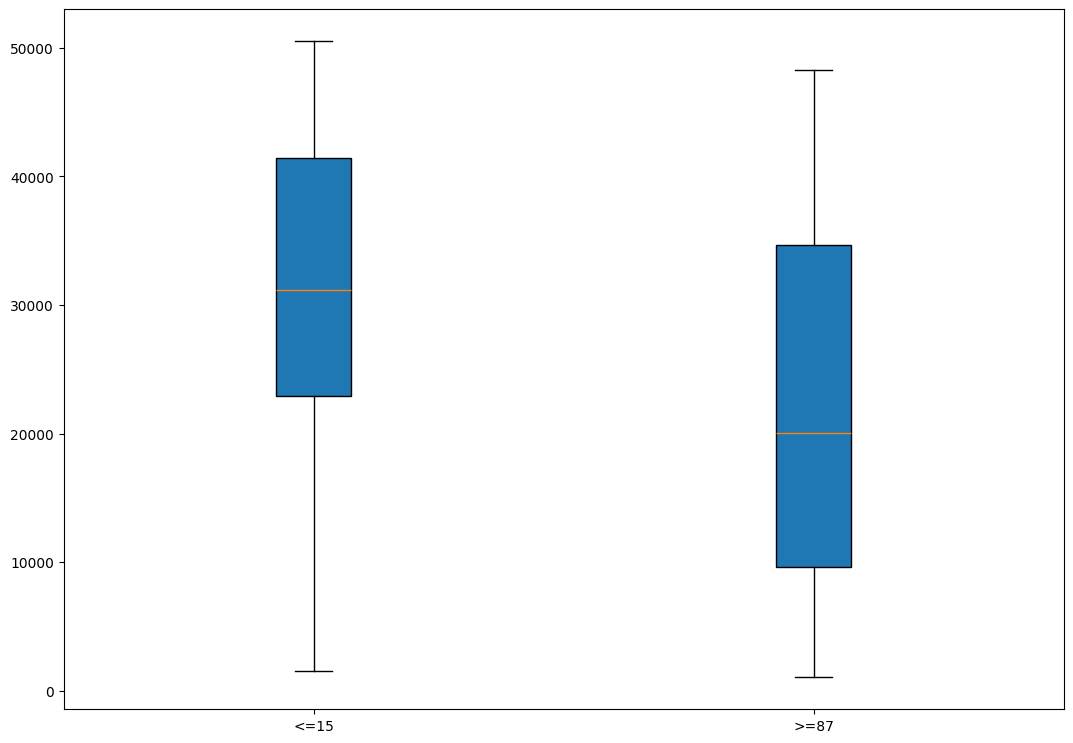

In [249]:
under_eq_15 = df[df['Age'] <= 15]['Billing Amount'].values.tolist()
over_eq_87 = df[df['Age'] >= 87]['Billing Amount'].values.tolist()

fig = plt.figure(figsize = (10, 7))
axes = fig.add_axes([0, 0, 1, 1])
boxp = axes.boxplot([under_eq_15, over_eq_87], patch_artist=True)

plt.xticks([1, 2], ['<=15', '>=87'])

10. Histogram

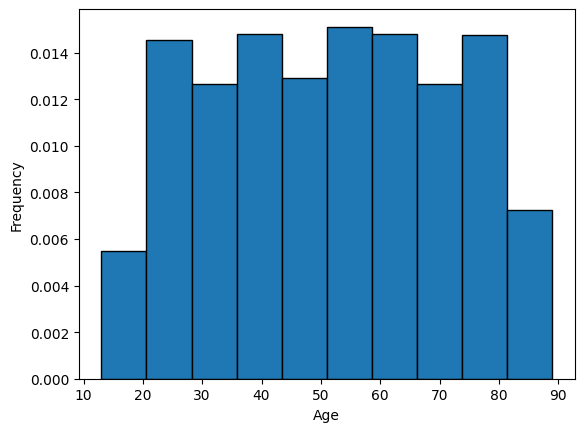

In [259]:
ages = df['Age'].values.tolist()
plt.hist(ages, edgecolor='black', weights= np.zeros_like(ages) + 1/8. / len(ages))

plt.xlabel('Age')
plt.ylabel('Frequency')

plt.show()

11. Convert to datetime and get month

In [251]:
df['Date of Admission'] = pd.to_datetime(df['Date of Admission'])

df.assign(month = df['Date of Admission'].dt.month.values.tolist())

,Unnamed: 0,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results,month
0,0,Bobby JacksOn,30,Male,B-,Cancer,2024-01-31,Matthew Smith,Sons and Miller,Blue Cross,18856.281306,328,Urgent,2024-02-02,Paracetamol,Normal,1
1,1,LesLie TErRy,62,Male,A+,Obesity,2019-08-20,Samantha Davies,Kim Inc,Medicare,33643.327287,265,Emergency,2019-08-26,Ibuprofen,Inconclusive,8
2,2,DaNnY sMitH,76,Female,A-,Obesity,2022-09-22,Tiffany Mitchell,Cook PLC,Aetna,27955.096079,205,Emergency,2022-10-07,Aspirin,Normal,9
3,3,andrEw waTtS,28,Female,O+,Diabetes,2020-11-18,Kevin Wells,"Hernandez Rogers and Vang,",Medicare,37909.782410,450,Elective,2020-12-18,Ibuprofen,Abnormal,11
4,4,adrIENNE bEll,43,Female,AB+,Cancer,2022-09-19,Kathleen Hanna,White-White,Aetna,14238.317814,458,Urgent,2022-10-09,Penicillin,Abnormal,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55495,55495,eLIZABeTH jaCkSOn,42,Female,O+,Asthma,2020-08-16,Joshua Jarvis,Jones-Thompson,Blue Cross,2650.714952,417,Elective,2020-09-15,Penicillin,Abnormal,8
55496,55496,KYle pEREz,61,Female,AB-,Obesity,2020-01-23,Taylor Sullivan,Tucker-Moyer,Cigna,31457.797307,316,Elective,2020-02-01,Aspirin,Normal,1
55497,55497,HEATher WaNG,38,Female,B+,Hypertension,2020-07-13,Joe Jacobs DVM,"and Mahoney Johnson Vasquez,",UnitedHealthcare,27620.764717,347,Urgent,2020-08-10,Ibuprofen,Abnormal,7
55498,55498,JENniFER JOneS,43,Male,O-,Arthritis,2019-05-25,Kimberly Curry,"Jackson Todd and Castro,",Medicare,32451.092358,321,Elective,2019-05-31,Ibuprofen,Abnormal,5


12. Scatter Plot

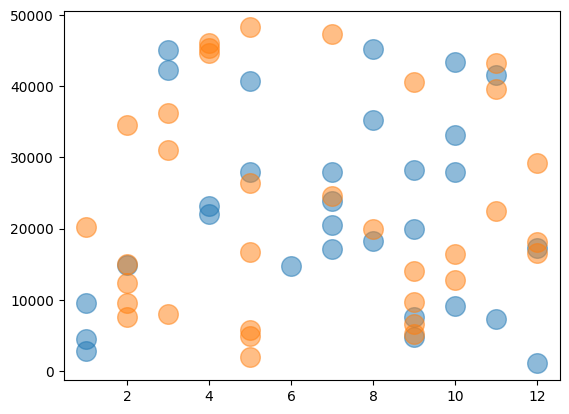

In [252]:
df2 = df[df['Age'] >= 87]

male = df2[df2['Gender'] == 'Male']
mx = male['Date of Admission'].dt.month.values.tolist()
my = male['Billing Amount'].values.tolist()
plt.scatter(mx, my, s = 200, alpha= 0.5)

female = df2[df2['Gender'] == 'Female']
fx = female['Date of Admission'].dt.month.values.tolist()
fy = female['Billing Amount'].values.tolist()
plt.scatter(fx, fy, s = 200, alpha= 0.5)

plt.show()